## Introduction
developing the heat equation into a numeric approximation

$$\frac{\partial T}{\partial t}=k\frac{\partial^{2}T}{\partial x^{2}}$$

$$\lim_{dt\rightarrow0}\frac{T\left(t+dt,x\right)-T\left(t,x\right)}{dt}=k\lim_{dx\rightarrow0}\frac{T\left(x+dx,t\right)-2T\left(x,t\right),T\left(x-dx,t\right)}{dx}$$

we will approximate
$$dt\approx0, dx\approx0$$

$$\frac{T\left(t+dt,x\right)-T\left(t,x\right)}{dt}\approx k\frac{T\left(t,x+dx\right)-2T\left(t,x\right)+T\left(t,x-dx\right)}{dx^{2}}$$

$$T\left(t+dt,x\right)\approx k\frac{\left(T\left(t,x+dx\right)-2T\left(t,x\right)+T\left(t,x-dx\right)\right)dt}{dx^{2}}+T\left(t,x\right)$$

$$T\left(t+dt,x\right)\approx k\frac{\left(\left(T\left(t,x+dx\right)-T\left(t,x\right)\right)-\left(T\left(t,x\right)-T\left(t,x-dx\right)\right)\right)dt}{dx^{2}}+T\left(t,x\right)$$

## Motivation
Solving the heat equation can be difficult. For initial conditions like $T(x,0)=cos(\omega x)$, it is pretty intuitive. But it gets more complicated when we have more complex initial conditions.
A numerical solution can be used to deal with these more complex cases easily. 

## Basic Functions
The following code contains the basic functions that will be used to simulate the heat equation.

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import plotly.graph_objects as go


length = 10
dx=0.1
k = 0.466
t = 10
delta_t = 0.001


def heat_equation(simulation:np.ndarray,t:int,x:int,k:float,delta_t:float)->float:
    """ 
    function that accepts the location of a point in the rod and the time and returns it's temperature
    dT/dt = k/2((T3-T2)-(T2-T1)) is the change in temperature
    and then according to euler
    T = dT/dt*delta_t+T2)
    """
    T1=simulation[t,x-1]
    T2=simulation[t,x]
    T3=simulation[t,x+1]
    # Here is the numerical approximation of the heat equation
    derTemp = k*(((T3-T2)-(T2-T1))/dx**2) 
    return derTemp*delta_t+T2

def heat_simulation(init_conditions:np.ndarray,p_amnt:float,k:float,t:float,delta_t:float):
    """ this constructs the 1d heat simulation
    """
    simulation = np.zeros(shape=(int(t/delta_t),p_amnt))
    simulation[0,0:p_amnt]=init_conditions
    for i in range(1,int(t/delta_t)):
        for j in range(1,p_amnt-1):
            simulation[i,j]=heat_equation(simulation,i-1,j,k,delta_t)
        simulation[i,p_amnt-1]=simulation[i,p_amnt-3]
        simulation[i,0]=simulation[i,2]
    return simulation

## Simulation

In [64]:
# Define grid, so that we can plot the simulation later
x_values = np.linspace(0, length, int(length / dx) + 2)
t_values = np.arange(0, t, delta_t)
X, T = np.meshgrid(x_values, t_values)

# Define initial conditions
init_conditions = np.cos(2*np.pi / 10 * x_values)

# Run the simulation
simulation = heat_simulation(init_conditions,len(x_values),k,t,delta_t)
simulation

array([[1.        , 0.9980656 , 0.99226987, ..., 0.99226987, 0.9980656 ,
        1.        ],
       [0.99209098, 0.99788566, 0.99209098, ..., 0.99209098, 0.99788566,
        0.99209098],
       [0.99191212, 0.9973456 , 0.99191212, ..., 0.99191212, 0.9973456 ,
        0.99191212],
       ...,
       [0.13109335, 0.13139857, 0.13109335, ..., 0.13109335, 0.13139857,
        0.13109335],
       [0.13106496, 0.13137012, 0.13106496, ..., 0.13106496, 0.13137012,
        0.13106496],
       [0.13103658, 0.13134168, 0.13103658, ..., 0.13103658, 0.13134168,
        0.13103658]])

## 3D Plotting of the Simulation
Here we plot the simulation in 3D using plotly. The axes are the position on the rod, the time, and the temperature.

In [65]:

# Create figure
fig = go.Figure(data=[go.Surface(x=X, y=T, z=simulation, colorscale='viridis')])

# Update layout
fig.update_layout(scene=dict(xaxis_title='Position',
                             yaxis_title='Time',
                             zaxis_title='Temperature'),
                  title='Temperature Distribution Over Time',
                  template='plotly_white')

# Save as interactive HTML file
fig.write_html('interactive_plot.html')

In [66]:
len(simulation[0])

102

## Animation of the Simulation
Here we animate the simulation using matplotlib. The x-axis is the position on the rod, and the y-axis is the temperature.

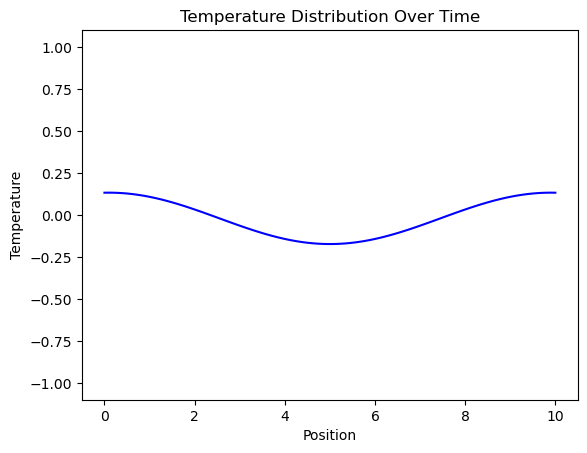

In [67]:
# Downsample frames (e.g., use every 5th frame)
downsample_factor = 50
downsampled_simulation = simulation[::downsample_factor]
downsampled_t_values = t_values[::downsample_factor]

# Function to update the plot for each frame of the animation
def update(frame):
    line.set_ydata(downsampled_simulation[frame])
    return line,

# Initialize the plot
fig, ax = plt.subplots()
line, = ax.plot(x_values, downsampled_simulation[0], color='blue')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(len(downsampled_t_values)), interval=10, blit=True)

plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Temperature Distribution Over Time')

# Save the animation as an MP4 file with lower DPI
ani.save('simulation_animation.mp4', writer='ffmpeg', dpi=200)

## Analytical Solution

Let the initial conditions (the temperature of the rod at time t=0) be described by the function $cos(\omega x)$

$$ T(x,0)=cos(\omega x)$$

The following boundary condition must be satisfied

$$\frac{\partial T}{\partial t}(0,t) = $\frac{\partial T}{\partial t}(L,t) = 0$$

This means that \omega must be an integer multiple of $2 \pi/L$. Because we are interested only in one period of the function we can assume that $\omega = 2\pi/L$

Then according to the heat equation, the second derivative of $cos(\omega x)$ with respect to space should be equal to the derivative with respect to time, at least at the time t=0

$$\frac{\partial T}{\partial t}(x,0)=k\frac{\partial^{2}T}{\partial x^{2}}(x,0)$$

Meaning, at the time t=0, the following should hold

$$-\omega sin(\omega x)=-k \omega ^2 cos(\omega x)$$

And from here comes the intuition that the solution is related to exponential decay. The rage of cahnge fo the temperature is proportional to the temperature itself. 

So this is the solution to the heat equation with the initial conditions $cos(\omega x)$

$$T(x,t)=e^{-k\omega^{2}t}cos(\omega x)$$

So, taking $\omega = 2\pi/L$ we get

$$T(x,t)=e^{-4\pi^{2}kt/L^{2}}cos(2\pi x/L)$$

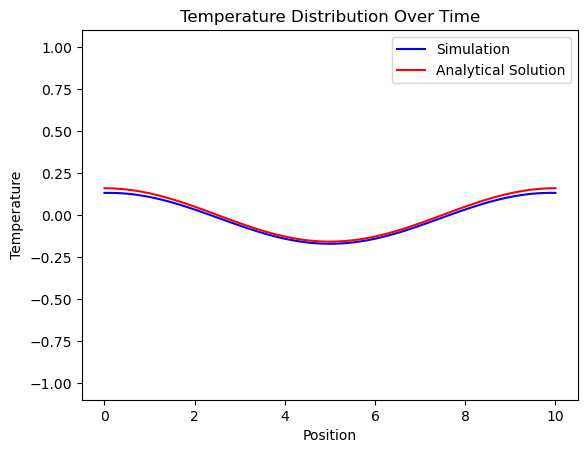

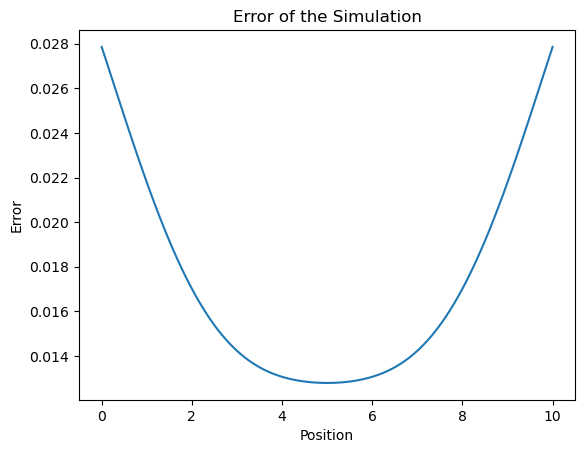

In [74]:
alalitical_solution = np.zeros(shape=(int(t/delta_t),len(x_values)))
omega = 2*np.pi/length
for i, time in enumerate(t_values):
    alalitical_solution[i]=np.cos(omega*x_values)*np.exp(-k*omega**2*time)

# comparing the simulation with the analytical solution
fig, ax = plt.subplots()
line, = ax.plot(x_values, simulation[9999], color='blue',label='Simulation')
line2, = ax.plot(x_values, alalitical_solution[9999], color='red',label='Analytical Solution')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Temperature Distribution Over Time')
plt.ylim(-1.1, 1.1)
plt.show()

error = np.abs(simulation[9999]-alalitical_solution[9999])
plt.plot(x_values,error)
plt.xlabel('Position')
plt.ylabel('Error')
plt.title('Error of the Simulation');

## Conclusion

The comparison to the analytical solution at the time t=10 shows that the numerical simulation is accurate up to 0.028 degrees.